<a href="https://colab.research.google.com/github/d-camargo/acidentes_bh/blob/main/Geopandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação e atualização de pacotes
Esses procedimentos já foram realizados em outra aula.

##Instalação de pacotes necessários

In [ ]:
!pip install geopandas
!pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.9 MB/s 
     |████████████████████████████████| 16.7 MB 311 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Pandas já foi utilizado nas aulas passadas e o GeoPandas é o foco desta aula.
#Os pacotes matplot e folium são necessários para plotagem dos mapas e utilização
#da função explore (mapa iterativo)
import pandas as pd
import geopandas as gpd
import matplotlib, folium
folium.__version__

'0.12.1.post1'

In [ ]:
!pip install folium --upgrade
folium.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.3 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


'0.8.3'

#Geopandas
Baixe do site do BHMaps a divisão de regionais do munícipio de [Belo Horizonte](https://geoservicos.pbh.gov.br/geoserver/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=ide_bhgeo:REGIONAL&srsName=EPSG:31983&outputFormat=SHAPE-ZIP) e insira o arquivo no seu Google Drive para que seja possível utiliza-lo. Já foi demonstrado esse passo nas aulas anteriores e existe um vídeo no SIGAA que ajuda vocês com esse passo novamete.

Uma função muito importante para o uso do GeoPandas é o plot (plotagem dos mapas no Notebook). Para isso vocês podem verificar a documentação oficial [Geopandas](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html?highlight=plot).

[Link - Geopandas2](https://geopandas.org/en/stable/docs/user_guide/missing_empty.html)

[Link - Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
gpd.__version__

'0.10.2'

###Leitura dos dados
Os dados do BD de acidentes serão importados pelo pandas e posteriormente utilizaremos os campos de coordenadas existentes no BD para georreferenciar a base de dados. O tratamento realizado no BD já foi demonstrado anteriormente.

In [ ]:
gac = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/si-bol-2020.csv', delimiter=';', encoding = "ISO-8859-1")
gac.columns = gac.columns.str.strip()
gac.head()

NUMERO_BOLETIM DATA HORA_BOLETIM     DATA_INCLUSAO TIPO_ACIDENTE  \
0  2020-011831835-001  07/03/2020 06:00  07/03/2020 06:58        H09002   
1  2020-011838326-001  07/03/2020 08:27  07/03/2020 08:34        H08002   
2  2020-011841962-001  07/03/2020 06:53  07/03/2020 09:19        H08002   
3  2020-011849103-001  07/03/2020 10:10  07/03/2020 10:40        H06002   
4  2020-011854660-001  07/03/2020 10:48  07/03/2020 11:38        H01002   

                                  DESC_TIPO_ACIDENTE  COD_TEMPO  \
0  COLISAO DE VEICULOS COM VITIMA                ...          2   
1  CHOQUE MECANICO COM VITIMA                    ...          2   
2  CHOQUE MECANICO COM VITIMA                    ...          2   
3  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL      ...          0   
4  ABALROAMENTO COM VITIMA                       ...          1   

        DESC_TEMPO  COD_PAVIMENTO        PAVIMENTO  COD_REGIONAL  ...  \
0  CHUVA                        1  ASFALTO                    25  ...   
1  CHUVA                        1  ASFALTO                    23  ...   
2  CHUVA                        1  ASFALTO                     0  ...   
3  NAO INFORMADO                0  NAO INFORMADO              25  ...   
4  BOM                          1  ASFALTO                    18  ...   

  VELOCIDADE_PERMITIDA COORDENADA_X COORDENADA_Y  HORA_INFORMADA  \
0                    0    605836.61   7798624.66             SIM   
1                   60    610478.49   7810433.11             SIM   
2                    0    605990.46   7806661.44             SIM   
3                    0         0.00         0.00             SIM   
4                    0    600896.61   7789929.77             SIM   

   INDICADOR_FATALIDADE  VALOR_UPS  DESCRIÇÃO_UPS DATA_ALTERACAO_SMSA  \
0                   NÃO          0  NÃO INFORMADO          00/00/0000   
1                   NÃO          0  NÃO INFORMADO          00/00/0000   
2                   NÃO          0  NÃO INFORMADO          00/00/0000   
3                   NÃO          0  NÃO INFORMADO          00/00/0000   
4                   NÃO          0  NÃO INFORMADO          00/00/0000   

   VALOR_UPS_ANTIGA DESCRIÇÃO_UPS_ANTIGA  
0                 0        NÃO INFORMADO  
1                 0        NÃO INFORMADO  
2                 0        NÃO INFORMADO  
3                 0        NÃO INFORMADO  
4                 0        NÃO INFORMADO  

[5 rows x 23 columns]

In [ ]:
#A variável 'geom' foi criada para transformar os valores de coordenadas (que estão em
#campos distintos do DataFrame) em pontos que o GeoPandas poderá ler.
#Logo após, foi definido no GeoDataFrame as informações da coluna 'geometry'.
geom = gpd.points_from_xy(x=gac['COORDENADA_X'], y=gac['COORDENADA_Y'])
gac = gpd.GeoDataFrame(gac,geometry=geom)
n1 = gac.shape[0]
n1

10624

In [ ]:
gac.head()

NUMERO_BOLETIM DATA HORA_BOLETIM     DATA_INCLUSAO TIPO_ACIDENTE  \
0  2020-011831835-001  07/03/2020 06:00  07/03/2020 06:58        H09002   
1  2020-011838326-001  07/03/2020 08:27  07/03/2020 08:34        H08002   
2  2020-011841962-001  07/03/2020 06:53  07/03/2020 09:19        H08002   
3  2020-011849103-001  07/03/2020 10:10  07/03/2020 10:40        H06002   
4  2020-011854660-001  07/03/2020 10:48  07/03/2020 11:38        H01002   

                                  DESC_TIPO_ACIDENTE  COD_TEMPO  \
0  COLISAO DE VEICULOS COM VITIMA                ...          2   
1  CHOQUE MECANICO COM VITIMA                    ...          2   
2  CHOQUE MECANICO COM VITIMA                    ...          2   
3  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL      ...          0   
4  ABALROAMENTO COM VITIMA                       ...          1   

        DESC_TEMPO  COD_PAVIMENTO        PAVIMENTO  COD_REGIONAL  ...  \
0  CHUVA                        1  ASFALTO                    25  ...   
1  CHUVA                        1  ASFALTO                    23  ...   
2  CHUVA                        1  ASFALTO                     0  ...   
3  NAO INFORMADO                0  NAO INFORMADO              25  ...   
4  BOM                          1  ASFALTO                    18  ...   

  COORDENADA_X COORDENADA_Y HORA_INFORMADA  INDICADOR_FATALIDADE  VALOR_UPS  \
0    605836.61   7798624.66            SIM                   NÃO          0   
1    610478.49   7810433.11            SIM                   NÃO          0   
2    605990.46   7806661.44            SIM                   NÃO          0   
3         0.00         0.00            SIM                   NÃO          0   
4    600896.61   7789929.77            SIM                   NÃO          0   

   DESCRIÇÃO_UPS DATA_ALTERACAO_SMSA VALOR_UPS_ANTIGA  DESCRIÇÃO_UPS_ANTIGA  \
0  NÃO INFORMADO          00/00/0000                0         NÃO INFORMADO   
1  NÃO INFORMADO          00/00/0000                0         NÃO INFORMADO   
2  NÃO INFORMADO          00/00/0000                0         NÃO INFORMADO   
3  NÃO INFORMADO          00/00/0000                0         NÃO INFORMADO   
4  NÃO INFORMADO          00/00/0000                0         NÃO INFORMADO   

                         geometry  
0  POINT (605836.610 7798624.660)  
1  POINT (610478.490 7810433.110)  
2  POINT (605990.460 7806661.440)  
3             POINT (0.000 0.000)  
4  POINT (600896.610 7789929.770)  

[5 rows x 24 columns]

In [ ]:
#Após verificar falha/erro nos dados das coordenadas, vamos desconsiderar as
#os registros que estão com problemas. Podemos verificar a quantidade de
#dados descartados com a função shape[]
drop = gac.loc[gac['COORDENADA_X']==0].index
gac.drop(drop, inplace = True)
n2 = gac.shape[0]
n2

9661

In [ ]:
#Importando um arquivo com extensão .shp
#Podemos verificar que o arquivo tem alguns dados como tipo float e são do tipo
#int. Vamos realizar a correção desses tipos de dados
region = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/REGIONAL.shp')
region

ID_REG  COD_REG SIGLA        NOME  AREA_KM2  PERIMETR_M  \
0     6.0     23.0    NT       NORTE    32.555   34762.823   
1     4.0     21.0    NE    NORDESTE    39.321   40951.450   
2     3.0     20.0    LE       LESTE    27.885   31621.064   
3     1.0     18.0    BA    BARREIRO    53.479   41634.604   
4     7.0     24.0    OE       OESTE    35.931   33054.546   
5     8.0     25.0    PA    PAMPULHA    51.038   37945.233   
6     9.0     26.0    VN  VENDA NOVA    29.172   28995.848   
7     5.0     22.0    NO    NOROESTE    30.071   33131.704   
8     2.0     19.0    CS  CENTRO-SUL    31.741   29872.501   

                                            geometry  
0  POLYGON ((610664.696 7810547.620, 610665.826 7...  
1  POLYGON ((617643.241 7808804.954, 617643.266 7...  
2  POLYGON ((614131.588 7801831.387, 614134.078 7...  
3  POLYGON ((603996.598 7793168.575, 604042.766 7...  
4  POLYGON ((601819.213 7795179.287, 601822.668 7...  
5  POLYGON ((603617.041 7807480.919, 603617.091 7...  
6  POLYGON ((603617.041 7807480.919, 603618.328 7...  
7  POLYGON ((603141.096 7800626.327, 603147.932 7...  
8  POLYGON ((615677.378 7793949.069, 615675.696 7...

In [ ]:
#Tratando os dados do BD da camada Region
region.COD_REG = region.COD_REG.astype(int)
region.ID_REG = region.ID_REG.astype(int)
region

ID_REG  COD_REG SIGLA        NOME  AREA_KM2  PERIMETR_M  \
0       6       23    NT       NORTE    32.555   34762.823   
1       4       21    NE    NORDESTE    39.321   40951.450   
2       3       20    LE       LESTE    27.885   31621.064   
3       1       18    BA    BARREIRO    53.479   41634.604   
4       7       24    OE       OESTE    35.931   33054.546   
5       8       25    PA    PAMPULHA    51.038   37945.233   
6       9       26    VN  VENDA NOVA    29.172   28995.848   
7       5       22    NO    NOROESTE    30.071   33131.704   
8       2       19    CS  CENTRO-SUL    31.741   29872.501   

                                            geometry  
0  POLYGON ((610664.696 7810547.620, 610665.826 7...  
1  POLYGON ((617643.241 7808804.954, 617643.266 7...  
2  POLYGON ((614131.588 7801831.387, 614134.078 7...  
3  POLYGON ((603996.598 7793168.575, 604042.766 7...  
4  POLYGON ((601819.213 7795179.287, 601822.668 7...  
5  POLYGON ((603617.041 7807480.919, 603617.091 7...  
6  POLYGON ((603617.041 7807480.919, 603618.328 7...  
7  POLYGON ((603141.096 7800626.327, 603147.932 7...  
8  POLYGON ((615677.378 7793949.069, 615675.696 7...

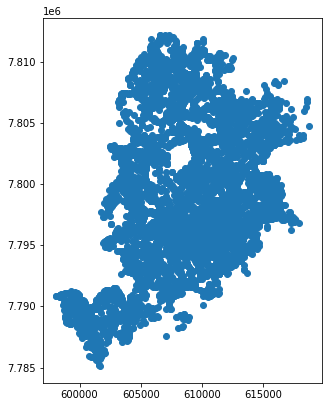

In [ ]:
#Plotando os mapas com a função plot()
gac.plot(figsize= (5,8))

####CRS
No caso da BD que nós criamos a partir da tabela de acidentes, nós ainda não definimos o CRS da camada. É importante definir para que não haja nenhum problema. Para isso usamos o set.crs
Caso fosse necessário reprojetar a camada, poderiamos utilizar o .to_crs

In [ ]:
#Checando o CRS das camadas
print('gac',gac.crs)
print('region',region.crs)

gac None
region epsg:31983


In [ ]:
gac = gac.set_crs(31983)
gac.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

###Mapas coropléticos (mapas temáticos)

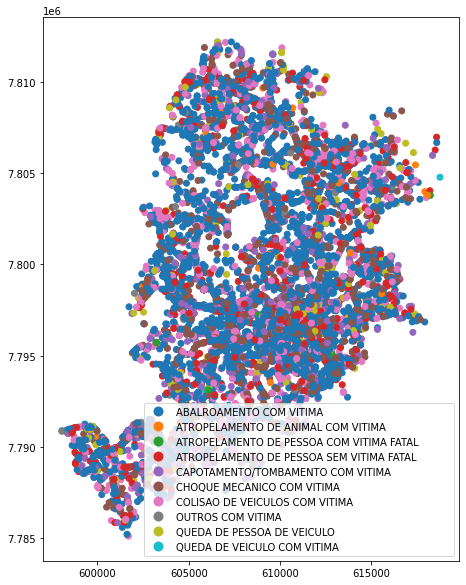

In [ ]:
#Plotagem dos dados de acidentes considerando o tipo de acidente
gac.plot(column='DESC_TIPO_ACIDENTE', figsize=(12,10), legend=True)

In [ ]:
ac_reg = gac.groupby('COD_REGIONAL').count().DESC_REGIONAL
ac_reg.name = 'N_ACIDENTES'
ac_reg = pd.DataFrame(ac_reg)
ac_reg['COD_REG'] = ac_reg.index
ac_reg['Index'] = list(range(10))
ac_reg = ac_reg.set_index('Index')
ac_reg.drop([0],inplace=True)
ac_reg

N_ACIDENTES  COD_REG
Index                      
1              907       18
2             1542       19
3              803       20
4              907       21
5             1121       22
6              798       23
7             1094       24
8             1285       25
9              861       26

In [ ]:
#Juntandos o BD das regiões com o agrupamento que fizemos dos acidentes temos:
reg_merge = pd.merge(region, ac_reg, how = 'inner', on = 'COD_REG' )
reg_merge

ID_REG  COD_REG SIGLA        NOME  AREA_KM2  PERIMETR_M  \
0       6       23    NT       NORTE    32.555   34762.823   
1       4       21    NE    NORDESTE    39.321   40951.450   
2       3       20    LE       LESTE    27.885   31621.064   
3       1       18    BA    BARREIRO    53.479   41634.604   
4       7       24    OE       OESTE    35.931   33054.546   
5       8       25    PA    PAMPULHA    51.038   37945.233   
6       9       26    VN  VENDA NOVA    29.172   28995.848   
7       5       22    NO    NOROESTE    30.071   33131.704   
8       2       19    CS  CENTRO-SUL    31.741   29872.501   

                                            geometry  N_ACIDENTES  
0  POLYGON ((610664.696 7810547.620, 610665.826 7...          798  
1  POLYGON ((617643.241 7808804.954, 617643.266 7...          907  
2  POLYGON ((614131.588 7801831.387, 614134.078 7...          803  
3  POLYGON ((603996.598 7793168.575, 604042.766 7...          907  
4  POLYGON ((601819.213 7795179.287, 601822.668 7...         1094  
5  POLYGON ((603617.041 7807480.919, 603617.091 7...         1285  
6  POLYGON ((603617.041 7807480.919, 603618.328 7...          861  
7  POLYGON ((603141.096 7800626.327, 603147.932 7...         1121  
8  POLYGON ((615677.378 7793949.069, 615675.696 7...         1542

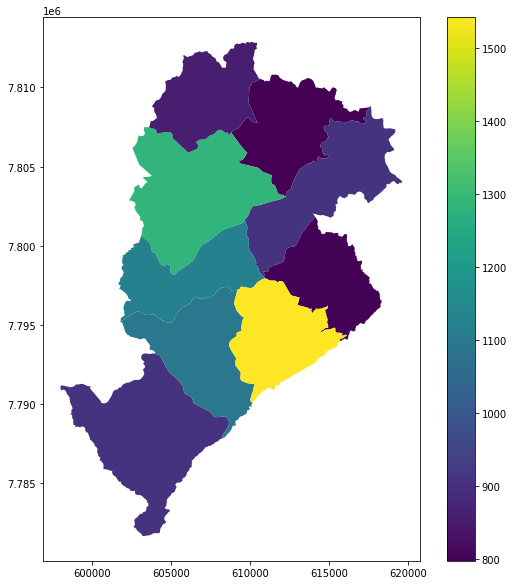

In [ ]:
reg_merge.plot(column = 'N_ACIDENTES', figsize=(10,10), legend=True)

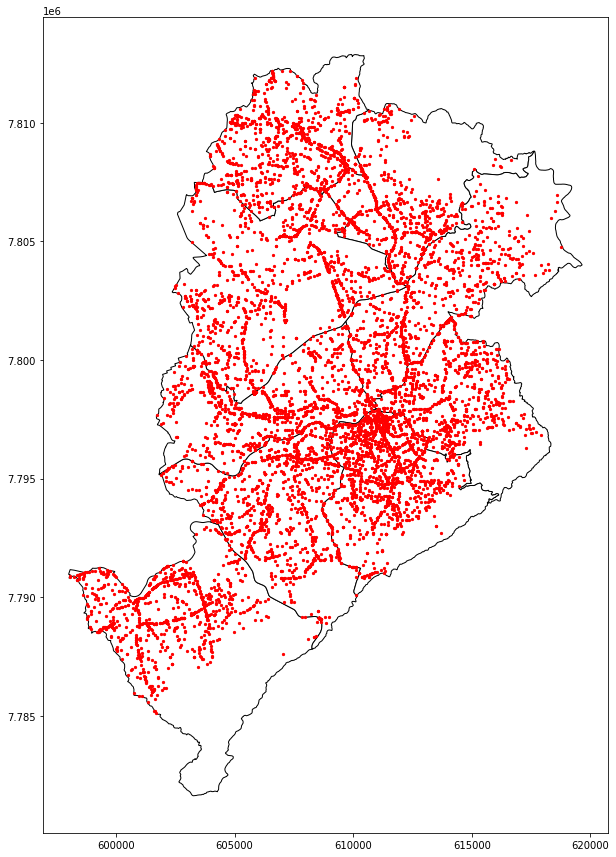

In [ ]:
#Plotagem com duas camadas em simultâneo
base = region.plot(color='white', edgecolor='black',figsize= (12,15))
gac.plot(ax=base, marker='o',color='red', markersize=5, legend=True)

inicio: 9661 , fim: 794 
A contagem de número de acidentes do banco de dados foi de 798


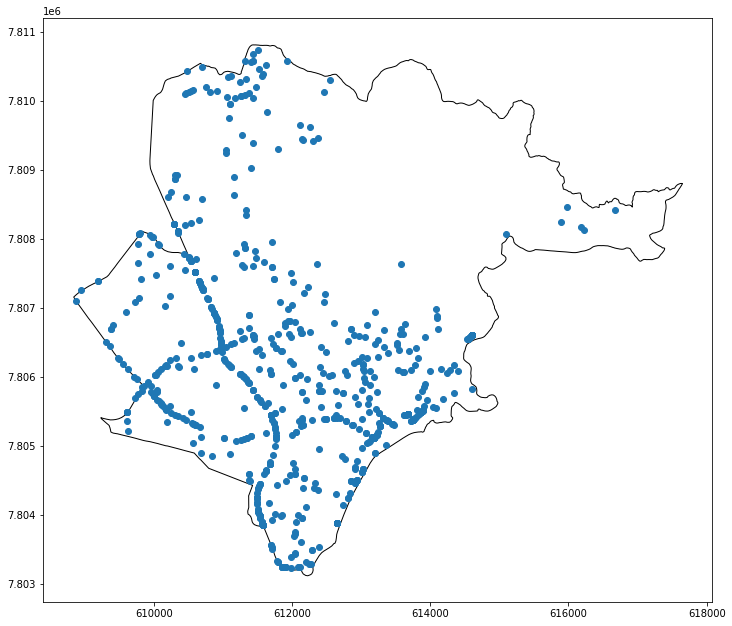

In [ ]:
#AVALIANDO REGIÃO NORTE - ACIDENTES COM INF. NA BASE DE DADOS E ATRAVÉS DA ANÁLISE ESPACIAL
gac_0 = gac[gac['geometry'].intersects
            (region['geometry'].iloc[0])]
print('inicio:',gac.shape[0],', fim:',gac_0.shape[0],'\nA contagem de número de acidentes do banco de dados foi de',reg_merge.iloc[0].N_ACIDENTES)
base = region.loc[region['ID_REG']==6].plot(color='white', edgecolor='black',figsize= (12,15))
gac_0.plot(ax=base)

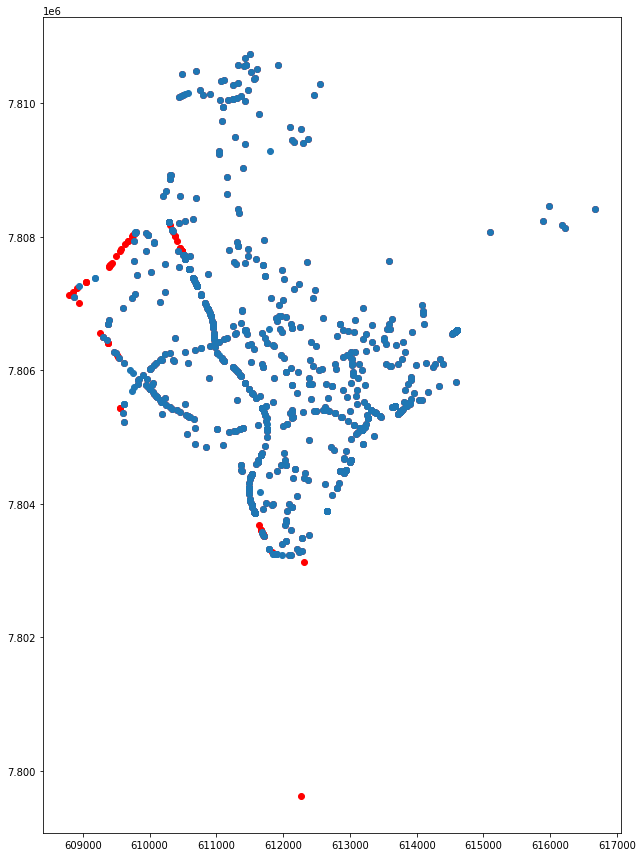

In [ ]:
#Verificando a diferença entre as duas bases de dados
#gac.columns
#gac.loc[gac['COD_REGIONAL']==23].plot(figsize=(15,15))
ax = gac.loc[gac['COD_REGIONAL']==23].plot(color = 'red', figsize=(12,15))
gac_0.plot(ax=ax, legend=True)

inicio: 9661 , fim: 794


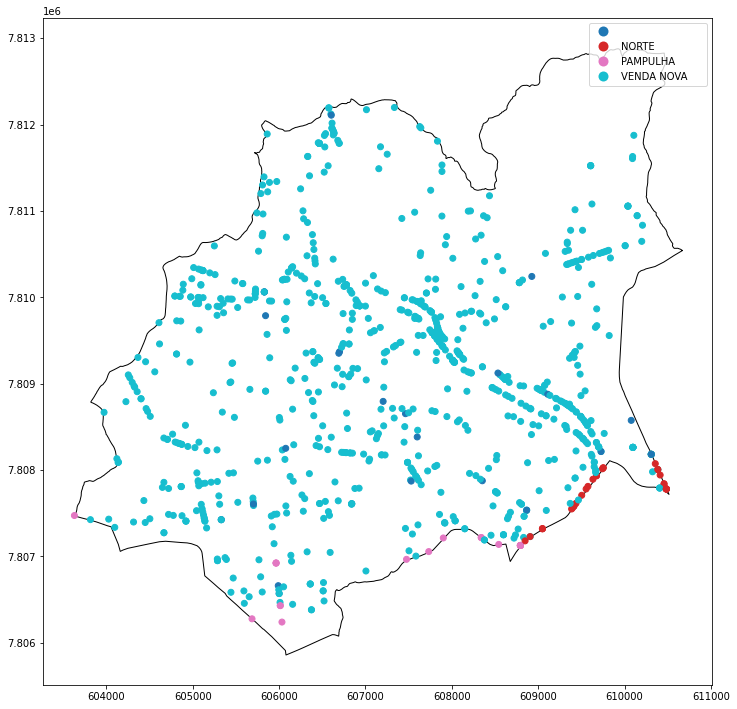

In [ ]:
gac1 = gac.shape[0]
gac_6 = gac[gac['geometry'].intersects(region['geometry'].iloc[6])]
print('inicio:',gac1,', fim:',gac_0.shape[0])
base = region.loc[region['ID_REG']==9].plot(color='white', edgecolor='black',figsize= (12,15))
gac_6.plot(ax=base,column='DESC_REGIONAL',legend=True)

In [ ]:
#Resultados da base de dados
norte = reg_merge.iloc[0].N_ACIDENTES
venda_nova = reg_merge.iloc[6].N_ACIDENTES
total = reg_merge.iloc[0].N_ACIDENTES + reg_merge.iloc[6].N_ACIDENTES
print('Venda Nota tem', venda_nova,
      'acidentes \nNorte tem',norte,
      'acidentes \nTotal de acidentes é', total)

Venda Nota tem 861 acidentes 
Norte tem 798 acidentes 
Total de acidentes é 1659


In [ ]:
#Resultados considerando a análise espacial
#gac_0.count().NUMERO_BOLETIM+gac_6.count().NUMERO_BOLETIM
print('Norte tem',gac_0.count().NUMERO_BOLETIM,'\nVenda Nota tem',gac_6.count().NUMERO_BOLETIM,'\nTotal tem',gac_0.count().NUMERO_BOLETIM+gac_6.count().NUMERO_BOLETIM)

Norte tem 794 
Venda Nota tem 913 
Total tem 1707


##Mapas iterativos
É possível verificar os dados através de uma janela iterativa, que utiliza como base o Open Street Maps (OSM). Para isso utilizamos o pacote folium tanto em baixo nível, quanto utilizando a ferramenta de LayerControl.
A documentação está [aqui.](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html)

In [ ]:
region.explore()

In [ ]:
region.loc[region['ID_REG']==6].explore()

In [ ]:
#Neste código estamos utilizando mais de uma camada para explorar os dados.
m = region.loc[region['ID_REG']==6].explore()
region.loc[region['ID_REG']==9].explore(m=m)
gac_6.explore(m=m, color='red')
gac_0.explore(m=m, color='blue')

#O controle de layers serve para ligar e desligar alguma camada
folium.LayerControl().add_to(m)

m

####Caso seja necessário, é possível atualizar o pacote Folium